<a href="https://colab.research.google.com/github/yashfirkedata/CV-Plant-Seedling-Classification/blob/main/CV_Plant_Seedling_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install split-folders

### **Performing train test split**

In [2]:
import zipfile

zip_file_path = '/content/drive/MyDrive/Datasets/NonsegmentedV2.zip'
extract_dir = '/content/Plant Seedlings'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Extraction complete.")


Extraction complete.


In [3]:
import splitfolders

input_folder = '/content/Plant Seedlings'
output_folder = '/content/dataset'

splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .0, .2))

Copying files: 5539 files [00:10, 553.60 files/s]


In [4]:
import glob

train_length = 0
test_length = 0

for name in glob.glob('/content/dataset/train/*'):
  train_length += len(glob.glob(name+'/*.png'))

for name in glob.glob('/content/dataset/test/*'):
  test_length += len(glob.glob(name+'/*.png'))

print(train_length,test_length)

4426 1113


# **Data Preprocessing:**

In [5]:
batch_size = 32
img_height = 120
img_width = 120

In [6]:
data_dir_train = '/content/dataset/train'
data_dir_test = '/content/dataset/test'

In [7]:
# creating train dataset
import tensorflow as tf
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               validation_split=0.2,
                                                               subset="training", seed=42,
                                                               image_size=(img_height, img_width),
                                                               batch_size=batch_size)

Found 4426 files belonging to 12 classes.
Using 3541 files for training.


In [8]:
# creating validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             validation_split=0.2,
                                                             subset="validation", seed=123,
                                                             image_size=(img_height, img_width),
                                                             batch_size=batch_size)

Found 4426 files belonging to 12 classes.
Using 885 files for validation.


In [9]:
# listing all classes in out dataset
import os
labels = sorted(os.listdir(data_dir_train))
print(labels)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherd’s Purse', 'Small-flowered Cranesbill', 'Sugar beet']


In [10]:
count = []
for i in labels:
  count.append(len(os.listdir(os.path.join(data_dir_train,i))))

In [12]:
count # This counted occurance of each class

[247, 361, 268, 570, 202, 430, 609, 205, 485, 219, 460, 370]

# **Data Visualization:**

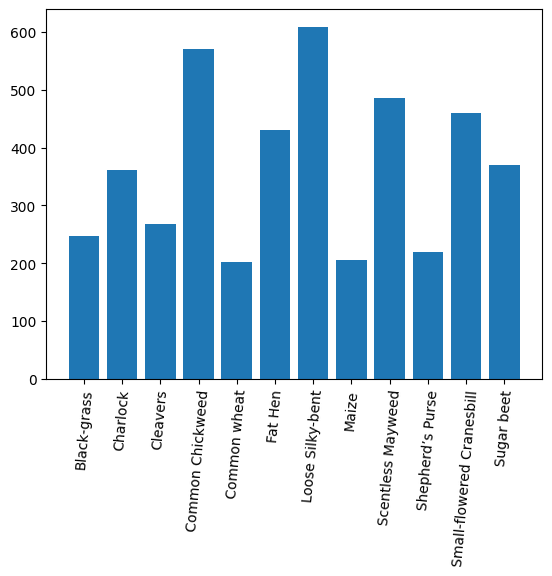

In [14]:
# creating plot for distribution of images in each class
import matplotlib.pyplot as plt

plt.bar(labels, count)
plt.xticks(rotation = 85)
plt.show()

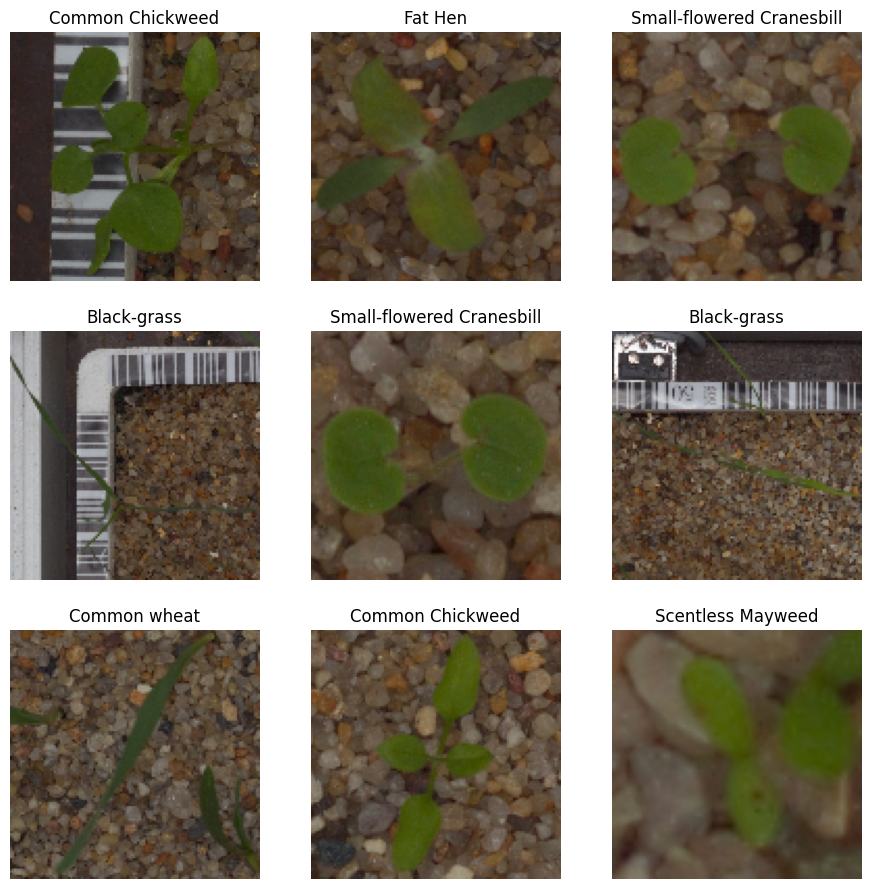

In [15]:
# visualizing few samples
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 11))
for image, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image[i].numpy().astype("uint8"))
    plt.title(labels[label[i]])
    plt.axis("off")